# This sorts the rideshare data into zip codes of origin and destination

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#reads in zipcode boundary geojson file
zipcodes = gpd.read_file('data/Chicago/Boundaries - ZIP Codes.geojson') 
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


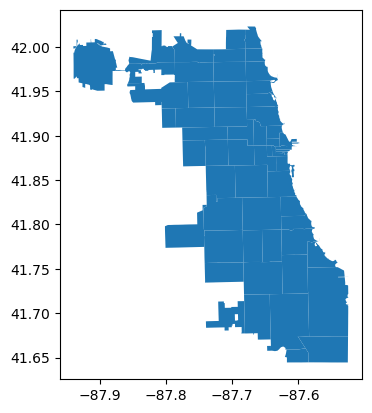

In [3]:
zipcodes.plot();

In [4]:
#drops unneeded zipcode columns
zipcodes = zipcodes[['zip', 'geometry']]

In [5]:
#reads in rideshare data
rs_from = pd.read_csv('data/Chicago/cleaned/rs_clean_M1.csv')
print(rs_from.shape)
rs_from.head(3)

(3383612, 22)


,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0,0023918a32baa84c59a60ec6acd38ef8d8876a55,01/01/2022 12:00:00 AM,01/01/2022 12:45:00 AM,2123,27.8,NaN,NaN,8.0,NaN,...,7.91,45.41,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
1,2,003b7701b5658afe3415169d091130f15c2d8434,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,830,3.6,1.703108e+10,1.703122e+10,8.0,22.0,...,1.02,11.02,False,1,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043)
2,3,003c710f7464bf348349ec4436fea275b97300bd,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,862,4.7,1.703122e+10,1.703108e+10,22.0,8.0,...,3.74,13.74,False,1,41.915910,-87.683826,POINT (-87.6838259399 41.9159097884),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)


In [6]:
#renames columns
rs_from = rs_from.rename(columns={"Pickup Centroid Latitude": "lat", "Pickup Centroid Longitude": "lng"})
rs_from

,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,lat,lng,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0,0023918a32baa84c59a60ec6acd38ef8d8876a55,01/01/2022 12:00:00 AM,01/01/2022 12:45:00 AM,2123,27.8,NaN,NaN,8.0,NaN,...,7.91,45.41,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
1,2,003b7701b5658afe3415169d091130f15c2d8434,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,830,3.6,1.703108e+10,1.703122e+10,8.0,22.0,...,1.02,11.02,False,1,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043)
2,3,003c710f7464bf348349ec4436fea275b97300bd,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,862,4.7,1.703122e+10,1.703108e+10,22.0,8.0,...,3.74,13.74,False,1,41.915910,-87.683826,POINT (-87.6838259399 41.9159097884),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
3,6,00b6c6407848e8f78a989a1b210309450c65fe8f,01/01/2022 12:00:00 AM,01/01/2022 12:30:00 AM,1332,6.7,1.703183e+10,1.703101e+10,22.0,1.0,...,3.34,18.34,False,1,41.928619,-87.685362,POINT (-87.685362024 41.9286190509),42.016011,-87.680162,POINT (-87.680162272 42.0160105638)
4,8,01345804c5bd6c0101bcb26a14d776d569edf97d,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,962,5.2,NaN,NaN,23.0,18.0,...,1.02,13.52,False,1,41.900070,-87.720918,POINT (-87.7209182385 41.9000696026),41.929297,-87.798032,POINT (-87.7980321814 41.9292973683)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383607,4704322,fc9e8ebd0459d9e5e1a38d5095d2252e613e6f6d,01/31/2022 11:45:00 PM,02/01/2022 12:00:00 AM,750,5.1,NaN,NaN,75.0,NaN,...,4.01,19.01,False,1,41.689730,-87.669054,POINT (-87.6690544032 41.6897299145),NaN,NaN,NaN
3383608,4704323,fd3dc27808a5711cd45841dd5da77095db6f2f34,01/31/2022 11:45:00 PM,02/01/2022 12:15:00 AM,1867,25.0,NaN,NaN,69.0,76.0,...,8.29,33.29,False,1,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),41.980264,-87.913625,POINT (-87.913624596 41.9802643146)
3383609,4704326,ffb1bdcdf9e54d77f14f39549981729e7c76294b,01/31/2022 11:45:00 PM,02/01/2022 12:00:00 AM,524,3.0,NaN,NaN,7.0,8.0,...,1.02,10.52,False,1,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3383610,4704327,ffc75f5072b9f7ee8b5c940abbbc23a1dc8cf65e,01/31/2022 11:45:00 PM,02/01/2022 12:00:00 AM,772,5.8,NaN,NaN,30.0,32.0,...,4.16,14.16,False,1,41.839087,-87.714004,POINT (-87.714003807 41.8390869059),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)


In [7]:
#creates column containing geopoints
rs_from['from_geo'] = rs_from.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
rs_from.head(3)

,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Shared Trip Authorized,Trips Pooled,lat,lng,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,from_geo
0,0,0023918a32baa84c59a60ec6acd38ef8d8876a55,01/01/2022 12:00:00 AM,01/01/2022 12:45:00 AM,2123,27.8,NaN,NaN,8.0,NaN,...,45.41,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN,POINT (-87.6333080367 41.899602111)
1,2,003b7701b5658afe3415169d091130f15c2d8434,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,830,3.6,1.703108e+10,1.703122e+10,8.0,22.0,...,11.02,False,1,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043),POINT (-87.63576009010001 41.9074919303)
2,3,003c710f7464bf348349ec4436fea275b97300bd,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,862,4.7,1.703122e+10,1.703108e+10,22.0,8.0,...,13.74,False,1,41.915910,-87.683826,POINT (-87.6838259399 41.9159097884),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),POINT (-87.6838259399 41.9159097884)


In [8]:
#drops unneeded columns
rs_from_geo = rs_from[['Trip ID', 'from_geo']]
rs_from_geo

,Trip ID,from_geo
0,0023918a32baa84c59a60ec6acd38ef8d8876a55,POINT (-87.6333080367 41.899602111)
1,003b7701b5658afe3415169d091130f15c2d8434,POINT (-87.63576009010001 41.9074919303)
2,003c710f7464bf348349ec4436fea275b97300bd,POINT (-87.6838259399 41.9159097884)
3,00b6c6407848e8f78a989a1b210309450c65fe8f,POINT (-87.685362024 41.9286190509)
4,01345804c5bd6c0101bcb26a14d776d569edf97d,POINT (-87.7209182385 41.9000696026)
...,...,...
3383607,fc9e8ebd0459d9e5e1a38d5095d2252e613e6f6d,POINT (-87.66905440319999 41.6897299145)
3383608,fd3dc27808a5711cd45841dd5da77095db6f2f34,POINT (-87.6161341112 41.7632467988)
3383609,ffb1bdcdf9e54d77f14f39549981729e7c76294b,POINT (-87.6494887289 41.9226862843)
3383610,ffc75f5072b9f7ee8b5c940abbbc23a1dc8cf65e,POINT (-87.714003807 41.8390869059)


In [9]:
#creates geodataframe from rideshare info
rs_from_geo = gpd.GeoDataFrame(rs_from_geo, 
                           crs = zipcodes.crs, 
                           geometry = rs_from['from_geo'])

In [10]:
#sorts origin taxi info into zipcodes
from_by_zip = gpd.sjoin(rs_from_geo, zipcodes, op = 'within')
from_by_zip = from_by_zip.rename(columns={"Trip ID": "trip_id", 'geometry': 'zip_geo', "zip": "from_zip"})
from_by_zip.head()

,trip_id,from_geo,zip_geo,index_right,from_zip
0,0023918a32baa84c59a60ec6acd38ef8d8876a55,POINT (-87.6333080367 41.899602111),POINT (-87.63331 41.89960),53,60610
1,003b7701b5658afe3415169d091130f15c2d8434,POINT (-87.63576009010001 41.9074919303),POINT (-87.63576 41.90749),53,60610
5,01683d623032683e9fcca03967dd2faeaf1141a7,POINT (-87.6333080367 41.899602111),POINT (-87.63331 41.89960),53,60610
10,02a26645383576883f66a648e41d1d71ab71aee0,POINT (-87.6291051864 41.9002212967),POINT (-87.62911 41.90022),53,60610
12,02bb1e2db87fd98e74b74d311941f47d9e41c1e7,POINT (-87.63576009010001 41.9074919303),POINT (-87.63576 41.90749),53,60610


In [11]:
from_by_zip.from_zip.value_counts()

60666    182359
60657    175642
60614    164945
60610    163497
60607    153258
60622    138594
60611    115246
60647    111301
60618    105812
60616     93535
60654     76424
60640     73926
60637     65202
60608     64134
60604     60375
60619     58184
60625     57720
60644     55710
60638     55338
60623     53289
60613     53259
60642     53065
60628     49889
60612     48974
60603     48122
60626     44213
60660     43689
60639     41886
60661     41044
60629     40189
60649     38699
60651     36206
60601     34665
60632     34623
60620     33669
60641     32275
60605     31625
60609     31301
60617     31005
60645     30102
60643     29344
60653     27070
60615     26677
60621     21301
60631     18377
60636     17482
60624     17164
60630     15956
60634     14896
60652     14391
60659     13033
60646      6456
60707      6138
60655      3559
60633      2481
60656      1089
60827       377
Name: from_zip, dtype: int64

### The following repeats the same process for destination data

In [12]:
rs_to = pd.read_csv('data/Chicago/cleaned/rs_clean_M1.csv')
print(rs_to.shape)
rs_to.head(3)

(3383612, 22)


,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0,0023918a32baa84c59a60ec6acd38ef8d8876a55,01/01/2022 12:00:00 AM,01/01/2022 12:45:00 AM,2123,27.8,NaN,NaN,8.0,NaN,...,7.91,45.41,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
1,2,003b7701b5658afe3415169d091130f15c2d8434,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,830,3.6,1.703108e+10,1.703122e+10,8.0,22.0,...,1.02,11.02,False,1,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043)
2,3,003c710f7464bf348349ec4436fea275b97300bd,01/01/2022 12:00:00 AM,01/01/2022 12:15:00 AM,862,4.7,1.703122e+10,1.703108e+10,22.0,8.0,...,3.74,13.74,False,1,41.915910,-87.683826,POINT (-87.6838259399 41.9159097884),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)


In [13]:
rs_to = rs_to.rename(columns={"Dropoff Centroid Latitude": "lat", "Dropoff Centroid Longitude": "lng"})

In [14]:
rs_to['to_geo'] = rs_to.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

In [15]:
rs_to_geo = rs_to[['Trip ID', 'to_geo']]

In [16]:
rs_to_geo = gpd.GeoDataFrame(rs_to_geo, 
                           crs = zipcodes.crs, 
                           geometry = rs_to['to_geo'])

In [17]:
to_by_zip = gpd.sjoin(rs_to_geo, zipcodes, op = 'within')
to_by_zip = to_by_zip.rename(columns={"Trip ID": "trip_id", 'geometry': 'zip_geo', "zip": "to_zip"})
to_by_zip.head()

,trip_id,to_geo,zip_geo,index_right,to_zip
1,003b7701b5658afe3415169d091130f15c2d8434,POINT (-87.6945323419 41.9208017043),POINT (-87.69453 41.92080),0,60647
28,0596c546a4995e1aaed0e26bf0e3ef8129da887b,POINT (-87.6922563262 41.9157411934),POINT (-87.69226 41.91574),0,60647
48,0a617c2544363e83e0a8fda861f932f759d3bb91,POINT (-87.6991553432 41.9227606205),POINT (-87.69916 41.92276),0,60647
99,143a7f9851b81acad21f5d44e43f6151a9781720,POINT (-87.6991553432 41.9227606205),POINT (-87.69916 41.92276),0,60647
167,24d0e013d8ad36df0f20c228323d8d92495607d3,POINT (-87.6991553432 41.9227606205),POINT (-87.69916 41.92276),0,60647


### Next, the origin and destination datasets will be merged and filtered for trips between different zip codes

In [18]:
trips_by_zip = from_by_zip.merge(to_by_zip, left_on='trip_id', right_on='trip_id')

In [19]:
trips_by_zip = trips_by_zip[['trip_id', 'from_zip', 'to_zip']]
trips_by_zip

,trip_id,from_zip,to_zip
0,003b7701b5658afe3415169d091130f15c2d8434,60610,60647
1,02a26645383576883f66a648e41d1d71ab71aee0,60610,60637
2,02bb1e2db87fd98e74b74d311941f47d9e41c1e7,60610,60661
3,0596c546a4995e1aaed0e26bf0e3ef8129da887b,60610,60647
4,06d419da95e7d6cc0a4300c1c89a775fdeb57439,60610,60611
...,...,...,...
2697032,c4b3c8f359360ecfbe432ffccfab03b1c933bae4,60643,60637
2697033,7b125389ece611e9a9327f37b169d90f5da7e41d,60707,60625
2697034,fc45861772b8a0425321cd234cbc1d11c4b1900b,60707,60634
2697035,86abce0650c0ec901b49ebe90c79ac44514dde49,60707,60651


In [20]:
#displays how many trips stay in the same zipcode
trips_by_zip.loc[trips_by_zip.from_zip == trips_by_zip.to_zip] 

,trip_id,from_zip,to_zip
82,42a92ce209fde7628355527847323f0ccbfadfe6,60610,60610
696,d0601fde5e060703c95a59486574582325a45574,60610,60610
1004,4a9c728e8d1129284ceeb31e8654439800422801,60610,60610
1290,7a5dd45439793126b8cc0d94e34a5bfc6f282879,60610,60610
1300,93e57a518eb7d06c54e94dd92a7f0d1676f81c34,60610,60610
...,...,...,...
2697004,d379f2b9f5e577ceb38616d6110edc10d4063903,60827,60827
2697006,ce6b172ebf288e00f7eb3ac0fac03aef5e8c6cd8,60827,60827
2697012,ab2015c6484dba04b75847ca2c351ed0eaeeb465,60643,60643
2697025,5d394eeb9efac6a2b324be9ad6bc37bd4b6b0f92,60643,60643


In [21]:
#save the trips that are between zip codes
diff = trips_by_zip.loc[trips_by_zip.from_zip != trips_by_zip.to_zip] 

In [22]:
#counts the number of trips between each pair of zip codes
diff[['from_zip', 'to_zip']].value_counts().reset_index(name='count')

,from_zip,to_zip,count
0,60610,60657,19366
1,60657,60610,19068
2,60614,60611,14157
3,60611,60614,13229
4,60654,60614,12753
...,...,...,...
3081,60631,60633,1
3082,60645,60656,1
3083,60655,60641,1
3084,60655,60634,1
